In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
automobile_df = pd.read_csv('datasets/auto-processed.csv')
automobile_df.head()

,wheel-base,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,114.2,3485,152,3.70,3.52,21.0,95.0,4150.0,25,25,...,0,0,0,0,0,1,0,0,0,0
1,101.2,2395,108,3.50,2.80,8.8,101.0,5800.0,23,29,...,1,0,0,0,0,0,0,1,0,0
2,98.4,2536,146,3.62,3.50,9.3,116.0,4800.0,24,30,...,1,0,0,0,0,0,0,1,0,0
3,110.0,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,...,1,0,0,0,0,0,0,1,0,0
4,96.3,2328,122,3.35,3.46,8.5,88.0,5000.0,25,32,...,1,0,0,0,1,0,0,0,0,0


In [52]:
# Linear regression with one feature

from sklearn.model_selection import train_test_split

X = automobile_df['horsepower']
Y = automobile_df['city-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = x_train.to_numpy().reshape(-1, 1)
x_train_scaled = scaler.fit_transform(x_train)

x_test = x_test.to_numpy().reshape(-1, 1)
x_test = scaler.transform(x_test)

linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [54]:
print('Training score : ', linear_model.score(x_train_scaled, y_train))

Training score :  0.6645303402107995


In [55]:
y_pred = linear_model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score

print('Testing score : ', r2_score(y_test, y_pred))

Testing score :  0.7999112295831807


Text(0, 0.5, 'City - MPG')

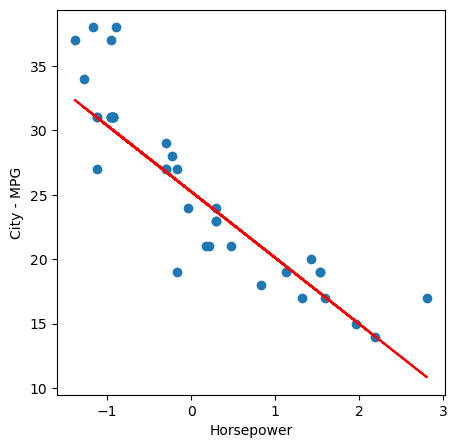

In [57]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'r')

plt.xlabel('Horsepower')
plt.ylabel('City - MPG')


In [58]:
# linear model for highway MPG

X = automobile_df['horsepower']
Y = automobile_df['highway-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train = x_train.to_numpy().reshape(-1, 1)
x_train_scaled = scaler.fit_transform(x_train)

x_test = x_test.to_numpy().reshape(-1, 1)
x_test = scaler.transform(x_test)

linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

print('Training score : ', linear_model.score(x_train_scaled, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score : ', r2_score(y_test, y_pred))

Training score :  0.6433086247491546
Testing score :  0.7160551778751467


Text(0, 0.5, 'Highway - MPG')

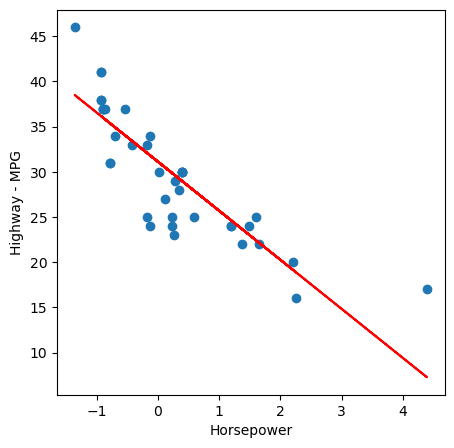

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'r')

plt.xlabel('Horsepower')
plt.ylabel('Highway - MPG')

In [60]:
# linear model for curb weight vs highway mpg

X = automobile_df['curb-weight']
Y = automobile_df['highway-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train = x_train.to_numpy().reshape(-1, 1)
x_train_scaled = scaler.fit_transform(x_train)

x_test = x_test.to_numpy().reshape(-1, 1)
x_test = scaler.transform(x_test)

linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

print('Training score : ', linear_model.score(x_train_scaled, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score : ', r2_score(y_test, y_pred))

Training score :  0.662486656516126
Testing score :  0.649324083880197


Text(0, 0.5, 'Highway - MPG')

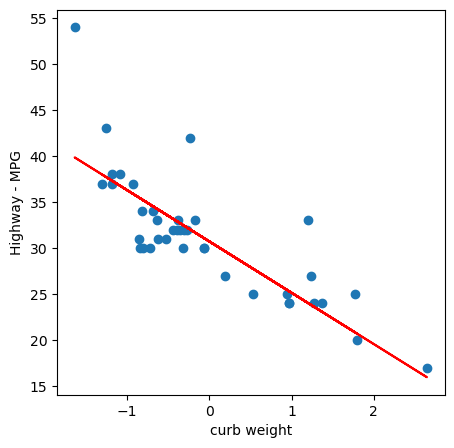

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'r')

plt.xlabel('curb weight')
plt.ylabel('Highway - MPG')

#### Linear regression for multiple features

In [62]:
X = automobile_df[['horsepower', 'curb-weight', 'price']]
Y = automobile_df['city-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [63]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [65]:
print('Training score : ', linear_model.score(x_train, y_train)) #r2 score of training data

y_pred = linear_model.predict(x_test)

print('Testing score : ', r2_score(y_test, y_pred))

Training score :  0.7508007324513104
Testing score :  0.7365270932621991


* Its a better score compared to single feature regression on train data.
* The score for test data has come down compared to training score but it is better than single feature regression.

In [66]:
predictors = X.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

horsepower    -4.246100
curb-weight   -3.113951
price          1.566101
dtype: float64


* The neg value indicates, as the horsepower and weight increase the milage decreases, as the price increases the milage goes up.

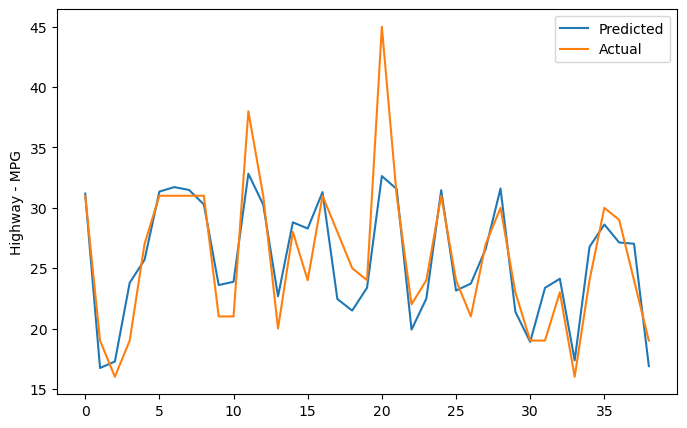

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Highway - MPG')
plt.legend()

In [68]:
X = automobile_df[['horsepower', 'curb-weight', 'price', 'num-of-cylinders', 'compression-ratio','bore', 'stroke' ]]
Y = automobile_df['city-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

print('Training score : ', linear_model.score(x_train, y_train)) #r2 score of training data

y_pred = linear_model.predict(x_test)

print('Testing score : ', r2_score(y_test, y_pred))

Training score :  0.823299218501981
Testing score :  0.9008202781861787


* much better score compared to previous regression model with fewer features.

In [69]:
predictors = X.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

curb-weight         -3.941911
horsepower          -2.404422
price                0.001157
bore                 0.081143
stroke               0.234380
num-of-cylinders     0.859708
compression-ratio    1.990804
dtype: float64


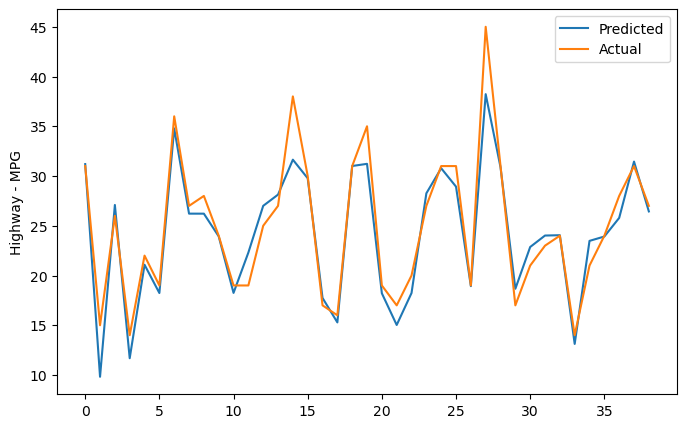

In [70]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Highway - MPG')
plt.legend()

* Lets try with all the features

In [71]:
X = automobile_df.drop(['city-mpg', 'highway-mpg'], axis = 1)
Y = automobile_df['city-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

print('Training score : ', linear_model.score(x_train, y_train)) #r2 score of training data

y_pred = linear_model.predict(x_test)

print('Testing score : ', r2_score(y_test, y_pred))

Training score :  0.8809485753696581
Testing score :  0.8222824034888492


### The R2 score goes down when we use all the features, Its a clear overfitting.
* It shows that, using all the features degrades the quality of the model.